# Slides - Prosper Loan Data Analysis
## by Progress Akpelu

## Investigation Overview


> In this analysis, i wanted to look at the factors a loan company, the Proper loan considers before individuals can get a loan and how these factors could be used to predict the interest rate and annual APR of the borrower.. 


## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others..

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Style and size of graph
sb.set_style('darkgrid')
sb.set(rc={'figure.figsize':(12,7)})

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_loan = pd.read_csv("prosperLoanData.csv")

In [3]:
# taking part of the columns that are needed for the analysis
cols = ['LoanStatus', 'BorrowerAPR', 'EmploymentStatus', 'StatedMonthlyIncome',
        'IncomeVerifiable', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'Term', 'IsBorrowerHomeowner', 'MonthlyLoanPayment',
        'ProsperRating (Alpha)', 'IncomeRange', 'ProsperScore', 'BorrowerRate', 'ListingCategory (numeric)', 'Occupation']
loan_set = df_loan[cols]

In [4]:
list_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

loan_set['ListingCategory'] = loan_set['ListingCategory (numeric)'].map(list_dict)
loan_set.drop(['ListingCategory (numeric)'], axis=1, inplace=True)

In [5]:
# Covert LoanStatus and EmploymentStatus into ordered categorical types
ordinal_var_dic = {'EmploymentStatus': ['Employed', 'Full-time', 'Self-employed', 'Not available', 'Other',
                                  'Part-time', 'Not employed', 'Retired'],
                  'LoanStatus': ['Current', 'Completed', 'Chargedoff', 'Defaulted', 'Past Due (1-15 days)', 
                                 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)',
                                 'Past Due (16-30 days)', 'FinalPaymentInProgress',
                                 'Past Due (>120 days)', 'Cancelled'],
                  'IncomeRange': ['$25,000-49,999', '$50,000-74,999', '$100,000+', '$75,000-99,999',
                                  'Not displayed', '$1-24,999', 'Not employed', '$0']}

for var in ordinal_var_dic:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dic[var])
    loan_set[var] = loan_set[var].astype(ordered_var)

In [6]:
ordinal_var_rating = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_var_rating)
loan_set['ProsperRating'] = loan_set['ProsperRating (Alpha)'].astype(ordered_var)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Borrower Rate

Interest rate for most of the borrowers were quite high. More than 7000 borrowers paid high interest rate of 0.32, also know as BorrowerRate. With less 1000 borrowers paying interest rate less than 0.05.

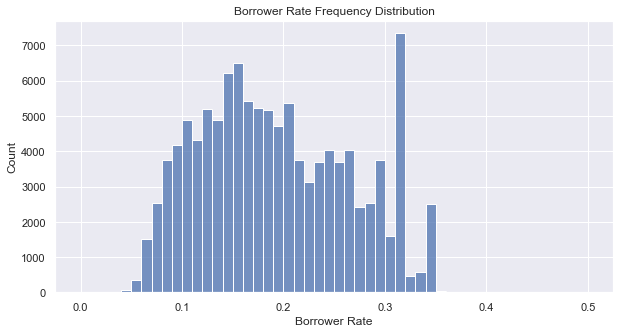

In [7]:
plt.figure(figsize=[10,5])
bins=np.arange(0, loan_set.BorrowerRate.max()+0.01, 0.01)

sb.histplot(data=loan_set, x='BorrowerRate', bins=bins)
plt.xlabel('Borrower Rate')
plt.title('Borrower Rate Frequency Distribution');

## Distribution of Borrower APR

The Borrower APR for most borrowers were high. More borrowers paid more annual percentage rate. More than 7000 borrowers had their APR at 0.36. Which showed that most peersons who got the loan accounted for high APR.

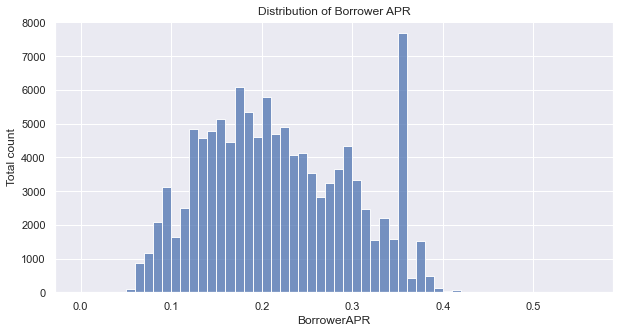

In [8]:
# defing the size of the figure
plt.figure(figsize=[10,5])
bins = np.arange(0, loan_set.BorrowerAPR.max()+0.05, 0.01)

sb.histplot(data=loan_set, x='BorrowerAPR', bins=bins)
plt.xlabel('BorrowerAPR')
plt.ylabel('Total count')
plt.title('Distribution of Borrower APR')
plt.show();

## BorrowerAPR vs ProsperScore

The Prosper Score (The score ranges from 1-10, with 10 being the best, or lowest risk score.) of the borrower accounts for how much interest is paid. Higher score means low interest rate and low score means high interest rate. This score is determined by seveal factors which include employemnt status, monthly income and if the borrower has a means of collateral.

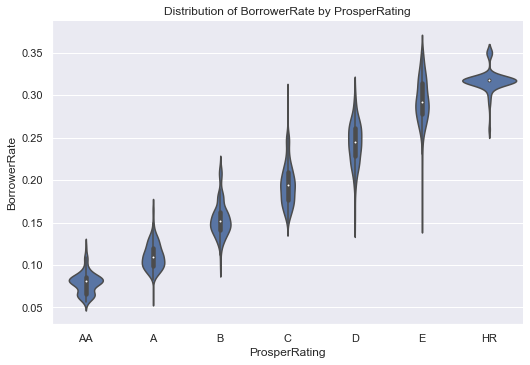

In [9]:
sample = np.random.choice(loan_set.shape[0], 2000, replace=False)
loan_samp = loan_set.loc[sample,:]

def violin(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.violinplot(x, y, color=default_color)

# plotting the graph
g = sb.PairGrid(data=loan_samp, x_vars=['ProsperRating'], y_vars=['BorrowerRate'],
               size=5, aspect=1.5)
g.map(violin)
plt.title('Distribution of BorrowerRate by ProsperRating')
plt.show();

## BorrowerAPR vs ProsperRating

The Prosper rating (1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA) of the borrower accounts for how much interest is paid. Higher rating means low interest rate and low rating means high interest rate. For a borrower to obtain loan with low interest rate, the borrower must get a good rating which are also determined by factors such as Employment status, if the borrower has a home and the monthly income.

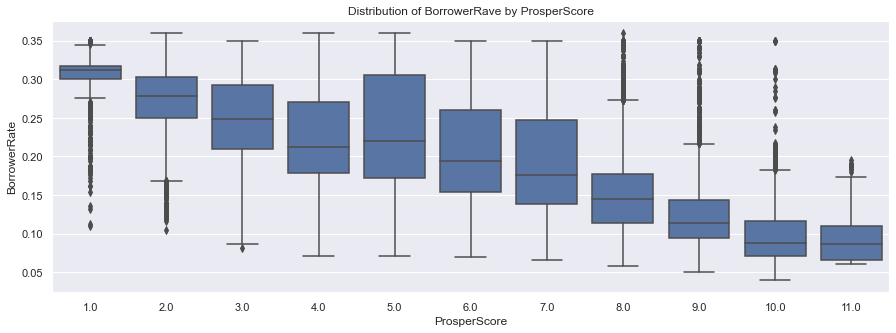

In [10]:
sample = np.random.choice(loan_set.shape[0], 2000, replace=False)
loan_samp = loan_set.loc[sample,:]
color = sb.color_palette()[0]
plt.figure(figsize=[15,5])

sb.boxplot(data=loan_set, x='ProsperScore', y='BorrowerRate', color=color)
plt.title('Distribution of BorrowerRave by ProsperScore')

plt.show();

## ProsperScore vs BorrowerRate vs IsBorrowerHomeowner

The ProsperScore, BorrowerRate and IsBorrowerHomeowner distribution shows that those who own homes have higher prosper score rate which accounted for the lower interest rate.

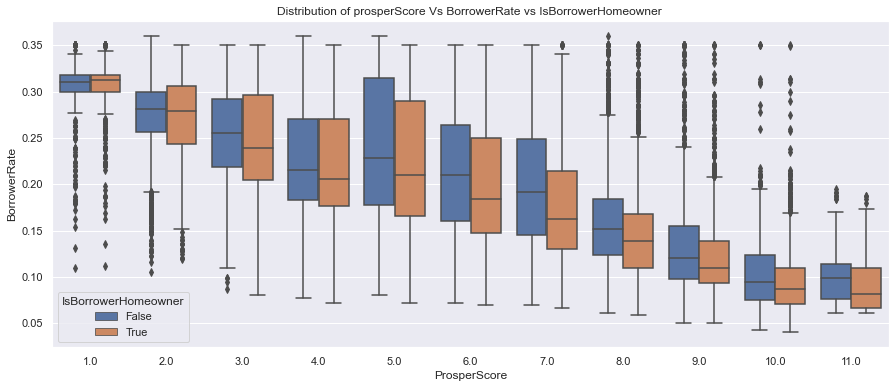

In [11]:
plt.figure(figsize=[15,6])
sb.boxplot(data=loan_set, x='ProsperScore', y='BorrowerRate', hue='IsBorrowerHomeowner')
plt.title('Distribution of prosperScore Vs BorrowerRate vs IsBorrowerHomeowner ')
plt.show();

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Prosper_Loan_Project_Part2.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 